# Project 2
## Lars Bosch, Philipp Brückelt, Thomas Engl

Import the python scripts and execute the code in this Notebook.

In [2]:
## import the python scripts
from neural_network import *
from data_sets import *
from optimizers import *
from compute import *

In [3]:
## import other modules
import autograd.numpy as np

# Exercise b)
The following code constructs a neural network which approximates the 1D Runge function. The first example uses 2 hidden layers with 50 and 100 nodes and only the sigmoid function as activation function. The cost function is given by the MSE.

In [5]:
n = 1_000                                        # number of points

layer_output_sizes = [50, 100, 1]                # define number of nodes in layers (output size is 1)
activation_funcs = [sigmoid, sigmoid, identity]  # activation functions
    
cost_fnc = mse                                   # choose mse as cost function
optimizer = Adam                                 # choose an optimization algorithm
output_size = 1

optimal learning rate:  0.023207944168063883
test MSE:  0.011113778529868622


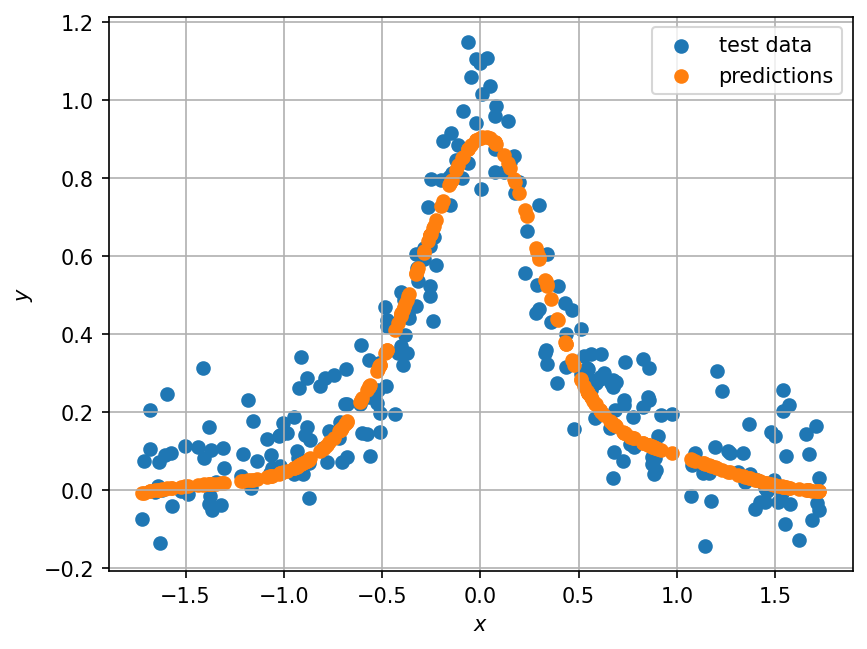

In [6]:
### 1D Runge function
np.random.seed(123)                              # set a seed
input_size = 1
data_ = load_runge_data(n, return_ymean=True)    # load data and keep mean of y_train for rescaling later
data = data_[0:4]
y_mean = data_[-1]

# tune the learning rate
eta_opt = tune_learning_rate(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimizer)
print("optimal learning rate: ", eta_opt)

test_mse, predicts = test_accuracy(data, activation_funcs, layer_output_sizes, 
                         input_size, output_size, cost_fnc, 
                         optimizer(eta=eta_opt), epochs_=100, return_predicts=True)

print("test MSE: ", test_mse)
# plot approximation
plot_1D_approx(data[1], data[3] + y_mean, predicts + y_mean)

For comparison, we try our network with the same architecture, but ReLU instead of sigmoid in the first hidden layer.

C:\Users\HP\anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


optimal learning rate:  0.049999999999999996
test MSE:  0.009093831176899858


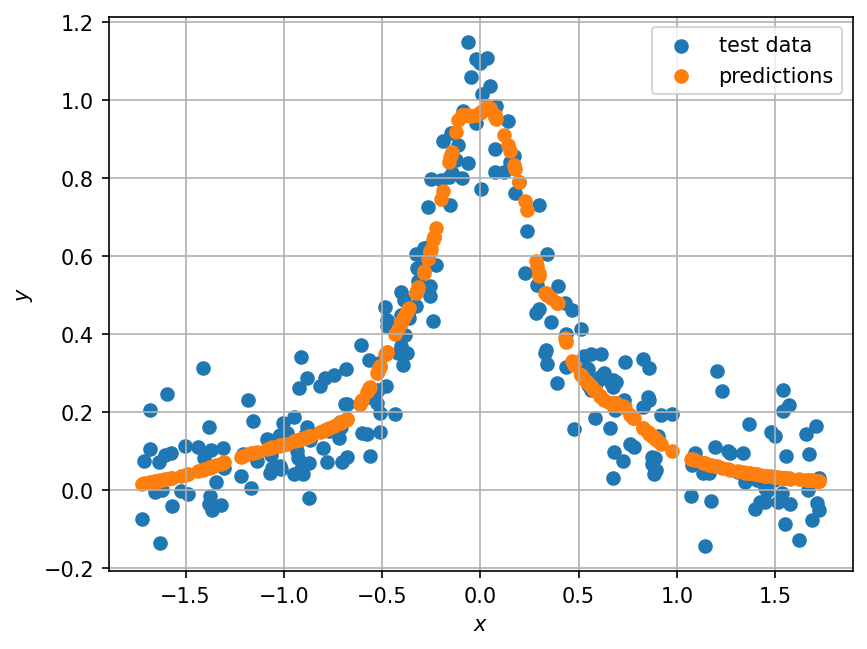

In [8]:
activation_funcs = [ReLU, sigmoid, identity]  # activation functions

# same code as before
eta_opt = tune_learning_rate(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimizer)
print("optimal learning rate: ", eta_opt)

test_mse, predicts = test_accuracy(data, activation_funcs, layer_output_sizes, 
                         input_size, output_size, cost_fnc, 
                         optimizer(eta=eta_opt), epochs_=100, return_predicts=True)

print("test MSE: ", test_mse)
# plot approximation
plot_1D_approx(data[1], data[3] + y_mean, predicts + y_mean)

Now, we approximate the Runge function again, but use ReLU instead of Sigmoid in the first hidden layer.

In [58]:
activation_funcs = [ReLU, sigmoid, identity]     # activation functions

mse_1, mse_2 = test_accuracy(data, activation_funcs, layer_output_sizes, 
                                                    input_size, output_size, cost_fnc, optimize_algorithm)
print("MSE for first guess: ", mse_1)
print("MSE after training:  ", mse_2)

MSE for first guess:  16.738908792209862
MSE after training:   0.011787645220612677


## Analysis of learning rate

In the following, we briefly analyze the effect of the choice of learning rate and the optimizater on the test MSE. This time, we use again sigmoid in both hidden layers.

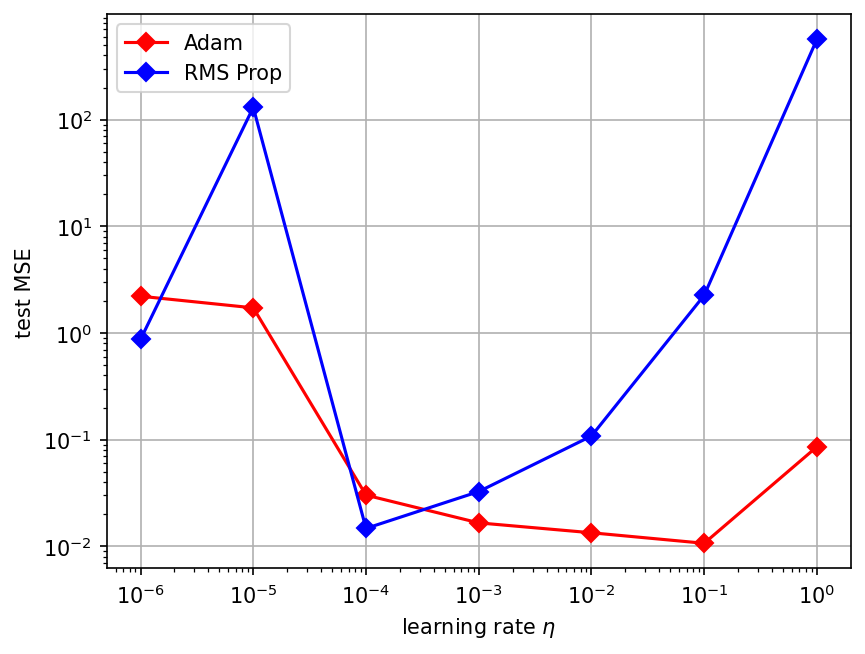

optimal learning rate Adam:  0.0038713184134056343
MSE Adam with optimal eta  0.013099205423073563
optimal learning rate RMS Prop:  0.0004999999999999999
MSE Adam with optimal eta  0.025618427855250047


In [15]:
activation_funcs = [sigmoid, sigmoid, identity] 
etas = np.logspace(-6, 0, 7)


# using Adam
mses_adam = [test_accuracy(data, activation_funcs, layer_output_sizes, 
                         input_size, output_size, cost_fnc, 
                         Adam(eta=eta_), epochs_=100) for eta_ in etas]
# using RMS Prop
mses_rms = [test_accuracy(data, activation_funcs, layer_output_sizes,
                            input_size, output_size, cost_fnc,
                            RMS_prop(eta=eta_), epochs_=100) for eta_ in etas]

plt.figure(dpi=150)
plt.loglog(etas, mses_adam, marker='D', color='red', label='Adam')
plt.loglog(etas, mses_rms, marker='D', color='blue', label='RMS Prop')
plt.xlabel(r'learning rate $\eta$')
plt.ylabel('test MSE')
plt.legend()
plt.grid()
plt.show()
    
# compare to eta_opt found by our tuning method
# result may not be the very best, because we use random search, but it should be close
eta_opt_adam = tune_learning_rate(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, Adam)
print("optimal learning rate Adam: ", eta_opt_adam)
test_mse_adam_opt = test_accuracy(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, 
                             optimizer(eta=eta_opt_adam), epochs_=100)
print("MSE Adam with optimal eta ", test_mse_adam_opt)

eta_opt_rms = tune_learning_rate(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, RMS_prop)
print("optimal learning rate RMS Prop: ", eta_opt_rms)
test_mse_rms_opt = test_accuracy(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, 
                             optimizer(eta=eta_opt_rms), epochs_=100)
print("MSE Adam with optimal eta ", test_mse_rms_opt)

# Extension - multi-dimensional functions
We can also try more sophisticated functions, e.g., the 2D Runge function or the Rastrigin function
$$
f \colon \mathbb{R}^d \to \mathbb{R}, \quad f(x) := Ad + \sum_{i=1}^d \left( x_i^2 - 10 \cos(2 \pi x) \right)
$$
where $A \in \mathbb{R}$ is a constant, usually $A = 10$.

In [ ]:
""" test how the network performs in different dimensions d = 2,...,5
the following functions first tunes the learning rate of a given optimizer. Afterwards, we compute the test MSE
and stop the runtime of the latter computation.
We do this for networks with two hidden layers and 50 nodes per layer. The activation function is always sigmoid.
"""
np.random.seed(123)
optimizer = Adam
activation_functions = [sigmoid, sigmoid, identity]
layer_output_sizes = [50, 50, 1]
test_dimensionality(activation_funcs, layer_output_sizes, optimizer)